In [1]:
%matplotlib inline
import chainer
import chainer.functions as F
import chainer.links as L
from chainer import initializers
import numpy as np
from chainer.utils import type_check
import matplotlib.pyplot as plt

In [2]:
# Training Data
n_samples = 1000
train_X = 20 * np.random.rand(n_samples).astype(np.float32)
train_Y= 3 * train_X + 8
train_Y += 5 * np.random.randn(n_samples).astype(np.float32)

In [3]:
X = chainer.Variable(train_X.reshape(n_samples, -1))
Y = chainer.Variable(train_Y.reshape(n_samples, -1))

In [4]:
# Define optimizer, here use SGD
opt = chainer.optimizers.MomentumSGD(lr=0.001)
li_reg = L.Linear(1, 1)
opt.setup(li_reg)

Optimisation finished!


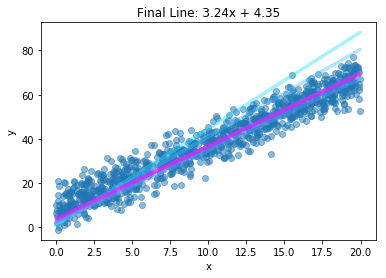

In [5]:
# This code is supplied to visualize your results.
plt.scatter(train_X, train_Y, alpha=0.5)

n_epochs = 150
for e in range(n_epochs):
    # Do forward
    h = li_reg(X)
    
    # inspect Variable's data
#     print X.data[:5]
#     print 'w', li_reg.W.data[0, 0], 'b', li_reg.b.data[0]
#     print h.data[:5]
    # Compute mean square error
    loss = F.mean_squared_error(Y, h)
    
    # clear grads of previous epochs before update
    li_reg.zerograds()
    
    # Back proppagation
    loss.backward()
    
    # Update grads
    opt.update()
    
    if (e + 1) % 20 == 0:
#         print 'Epoch ', '%04d' % (e+1),' loss=%.9f' % loss.data, \
#                 '   W=%.9f' % li_reg.W.data, '   b=%.9f'% li_reg.b.data
        plt.plot(train_X, h.data, color=plt.cm.cool(e*1.0/n_epochs), alpha = 0.4, lw =3)

            
print 'Optimisation finished!'
slope = li_reg.W.data[0,0]
intercept = li_reg.b.data[0]
plt.title("Final Line: {0:.3}x + {1:.3}".format(slope, intercept))
plt.xlabel('x')
plt.ylabel('y')